GD 394 was observed again by TESS in Sectors 55 and 56

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec
import lightkurve as lk

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [4]:
search_result = lk.search_lightcurve('TIC 259773610')
search_result

SearchResult containing 13 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 15 2019      SPOC     120   259773610      0.0
  1 TESS Sector 15 2019 TESS-SPOC    1800   259773610      0.0
  2 TESS Sector 15 2019       QLP    1800   259773610      0.0
  3 TESS Sector 15 2019     TASOC     120   259773610      0.0
  4 TESS Sector 15 2019     TASOC    1800   259773610      0.0
  5 TESS Sector 15 2019     TASOC    1800   259773610      0.0
  6 TESS Sector 16 2019      SPOC     120   259773610      0.0
  7 TESS Sector 16 2019 TESS-SPOC    1800   259773610      0.0
  8 TESS Sector 16 2019       QLP    1800   259773610      0.0
  9 TESS Sector 55 2022      SPOC      20   259773610      0.0
 10 TESS Sector 55 2022      SPOC     120   259773610      0.0
 11 TESS Sector 56 2022      SPOC      20   259773610      0.0
 12 TESS Sector 56 2022      SPOC     120   259773610      0.0

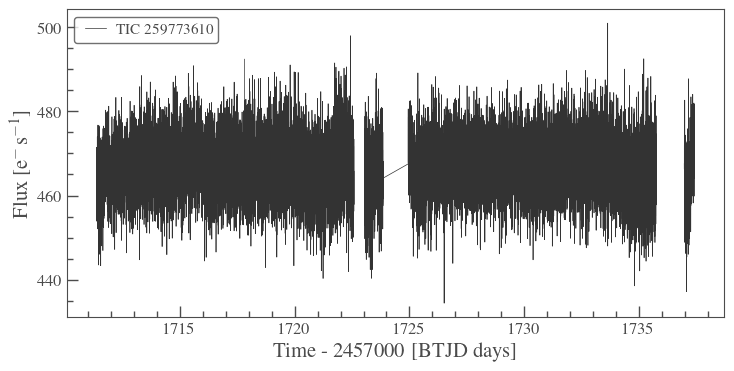

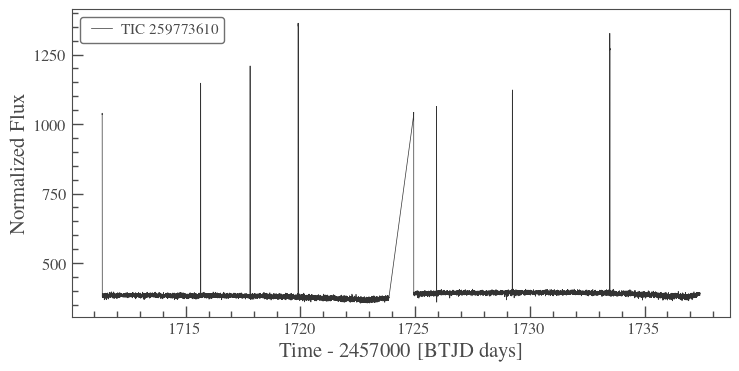

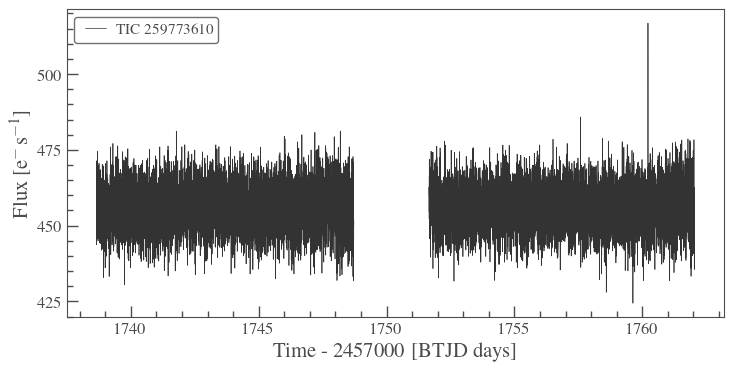

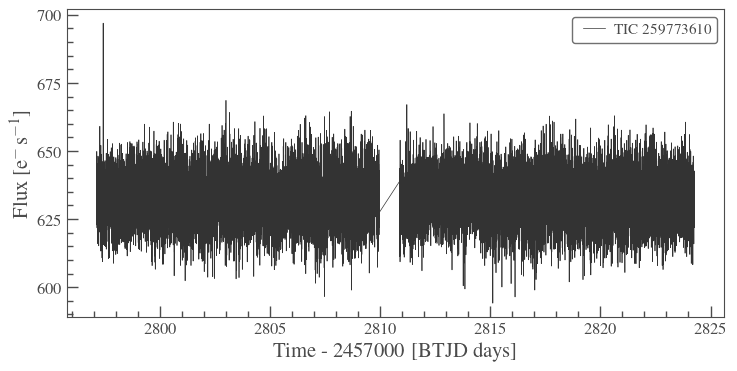

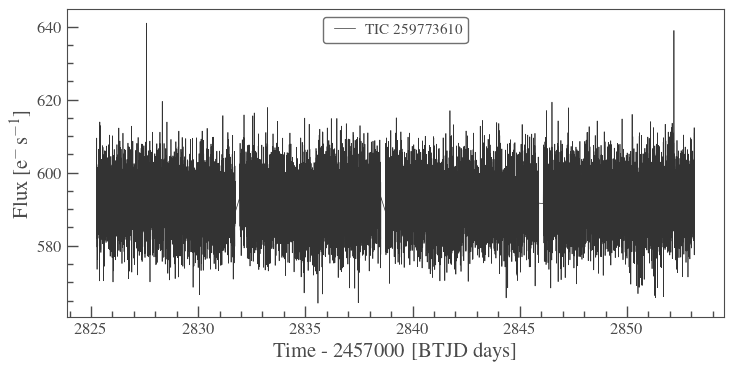

In [5]:
for sr in search_result:
    if sr.exptime[0].value == 120:
        lc = sr.download(download_dir='mastDownload/')
        lc.plot()

2.308607159483758 d


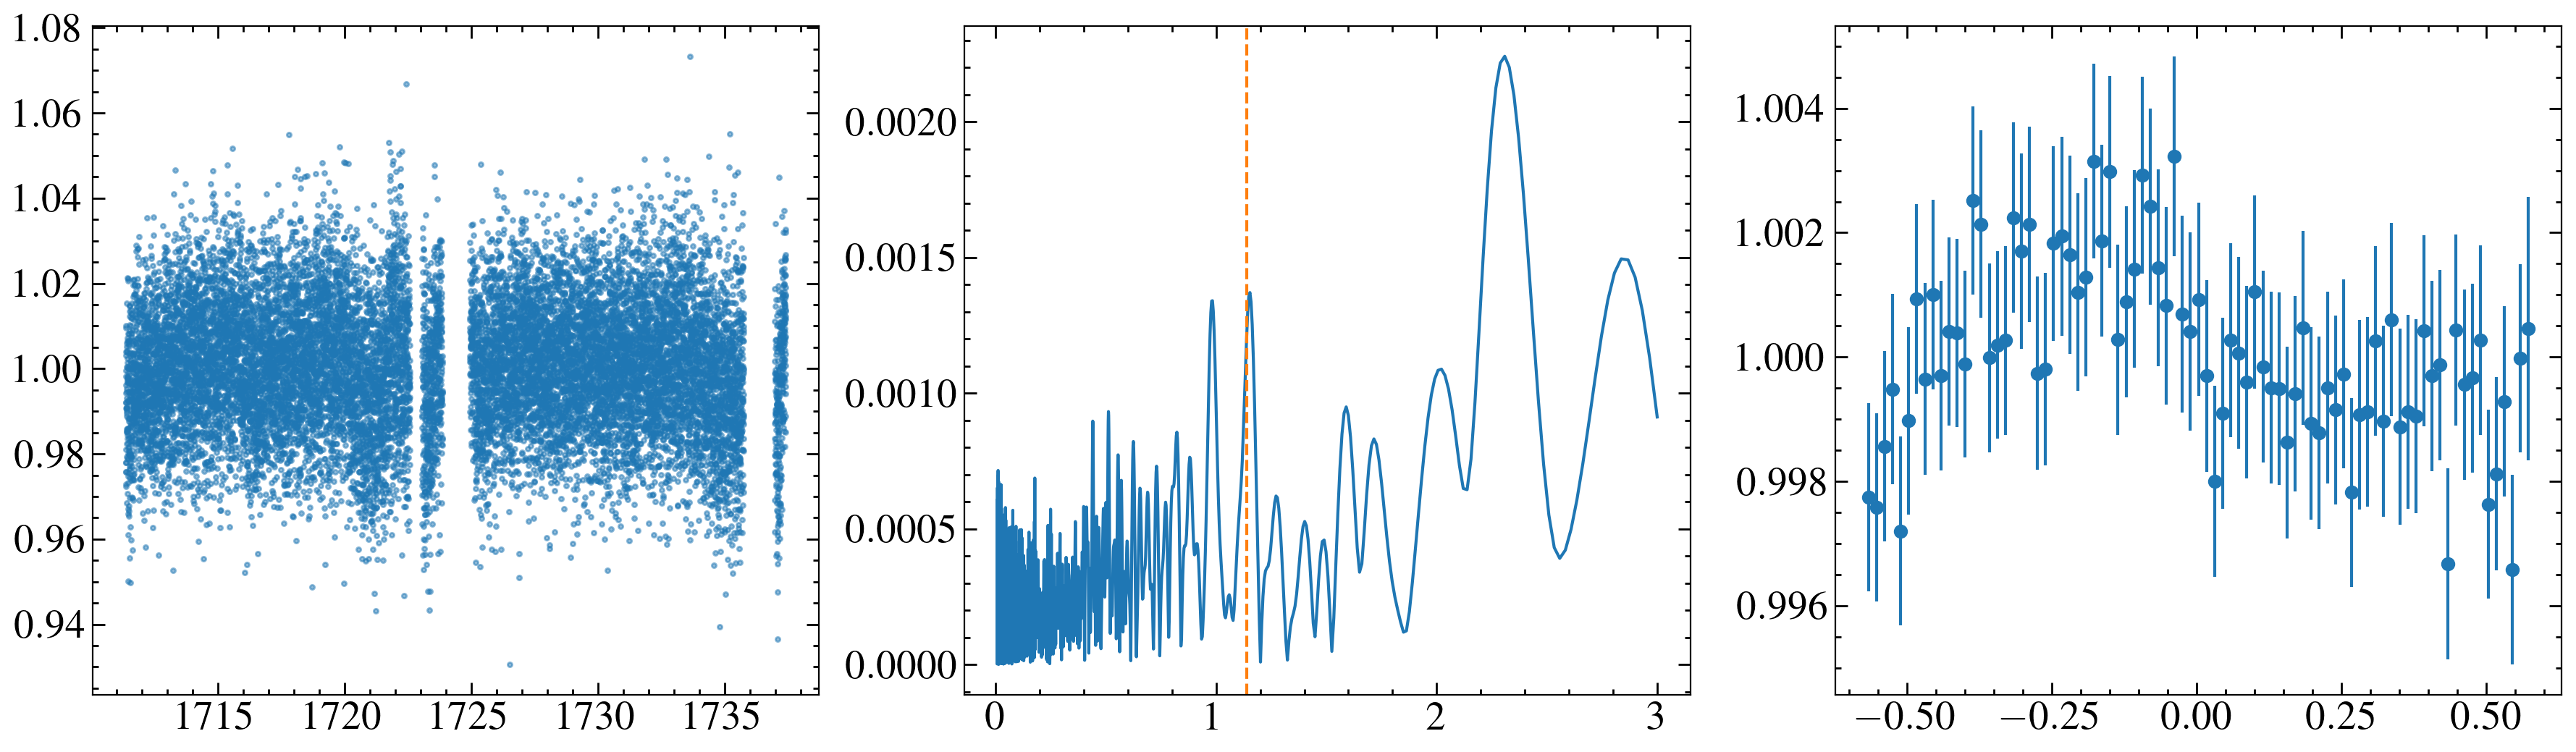

0.570342773945468 d


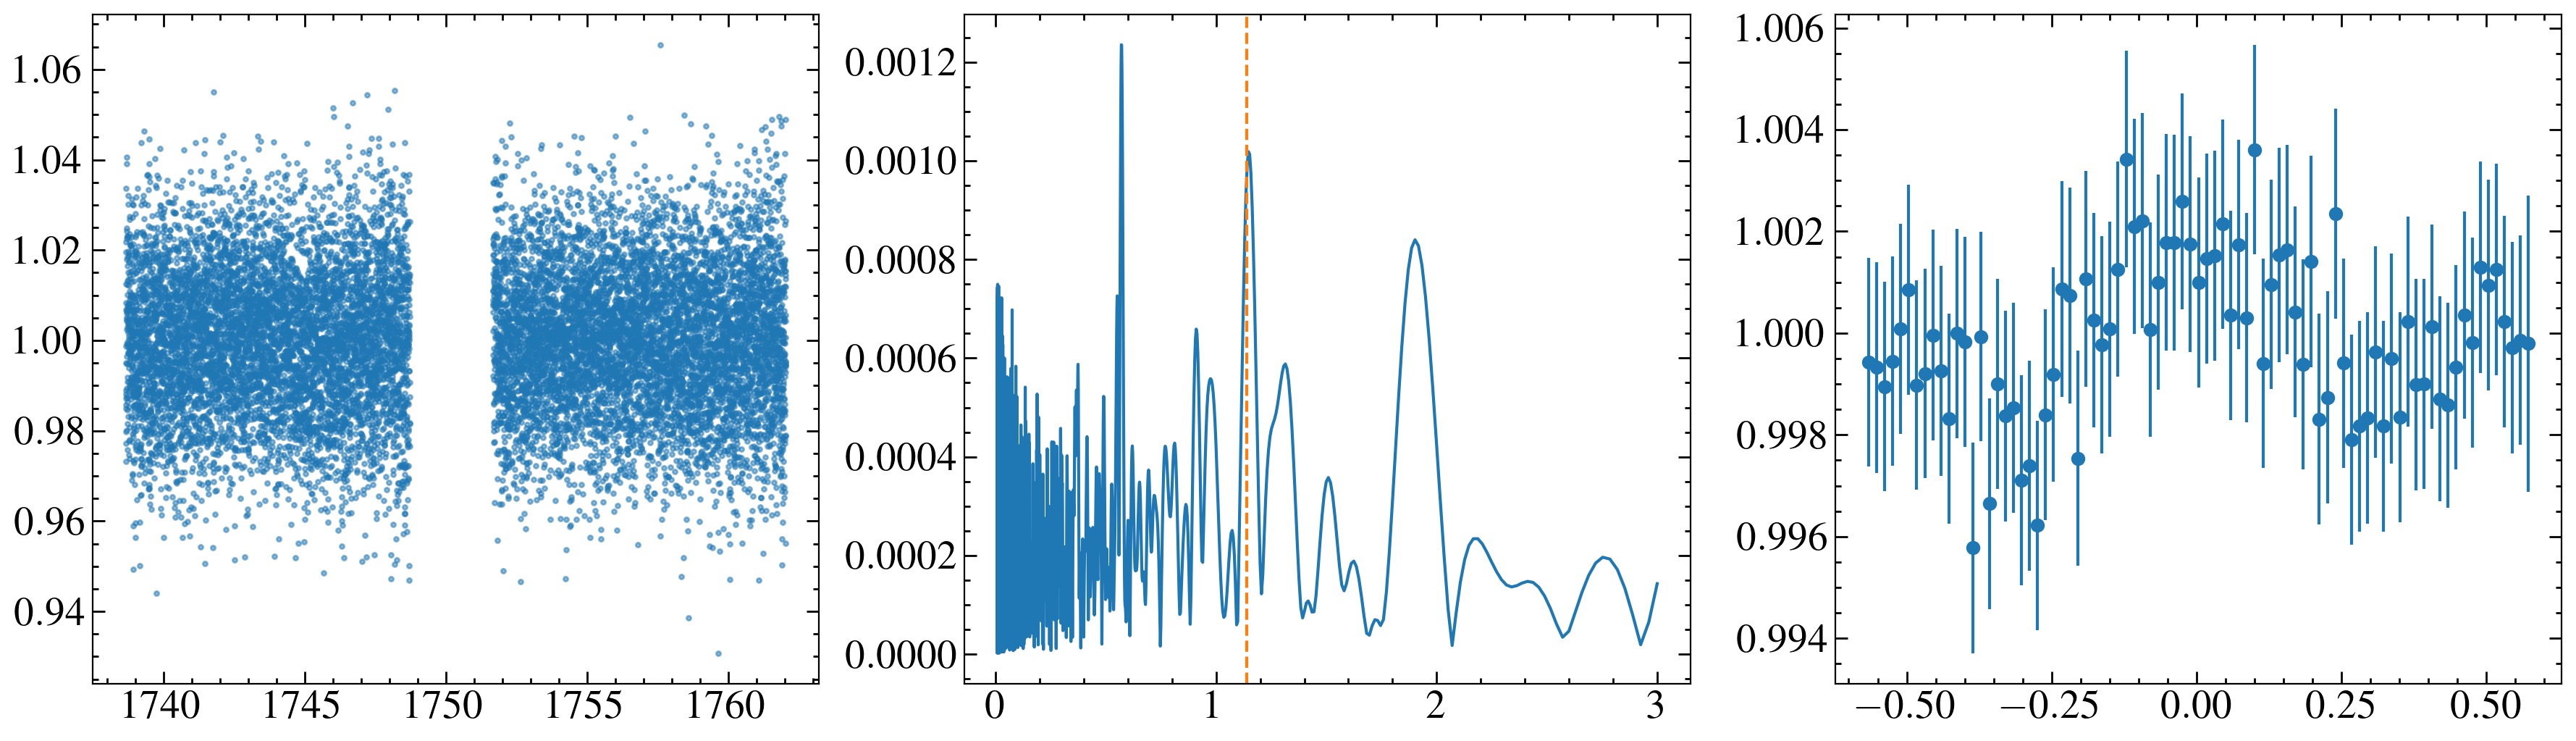

0.9858426775819805 d


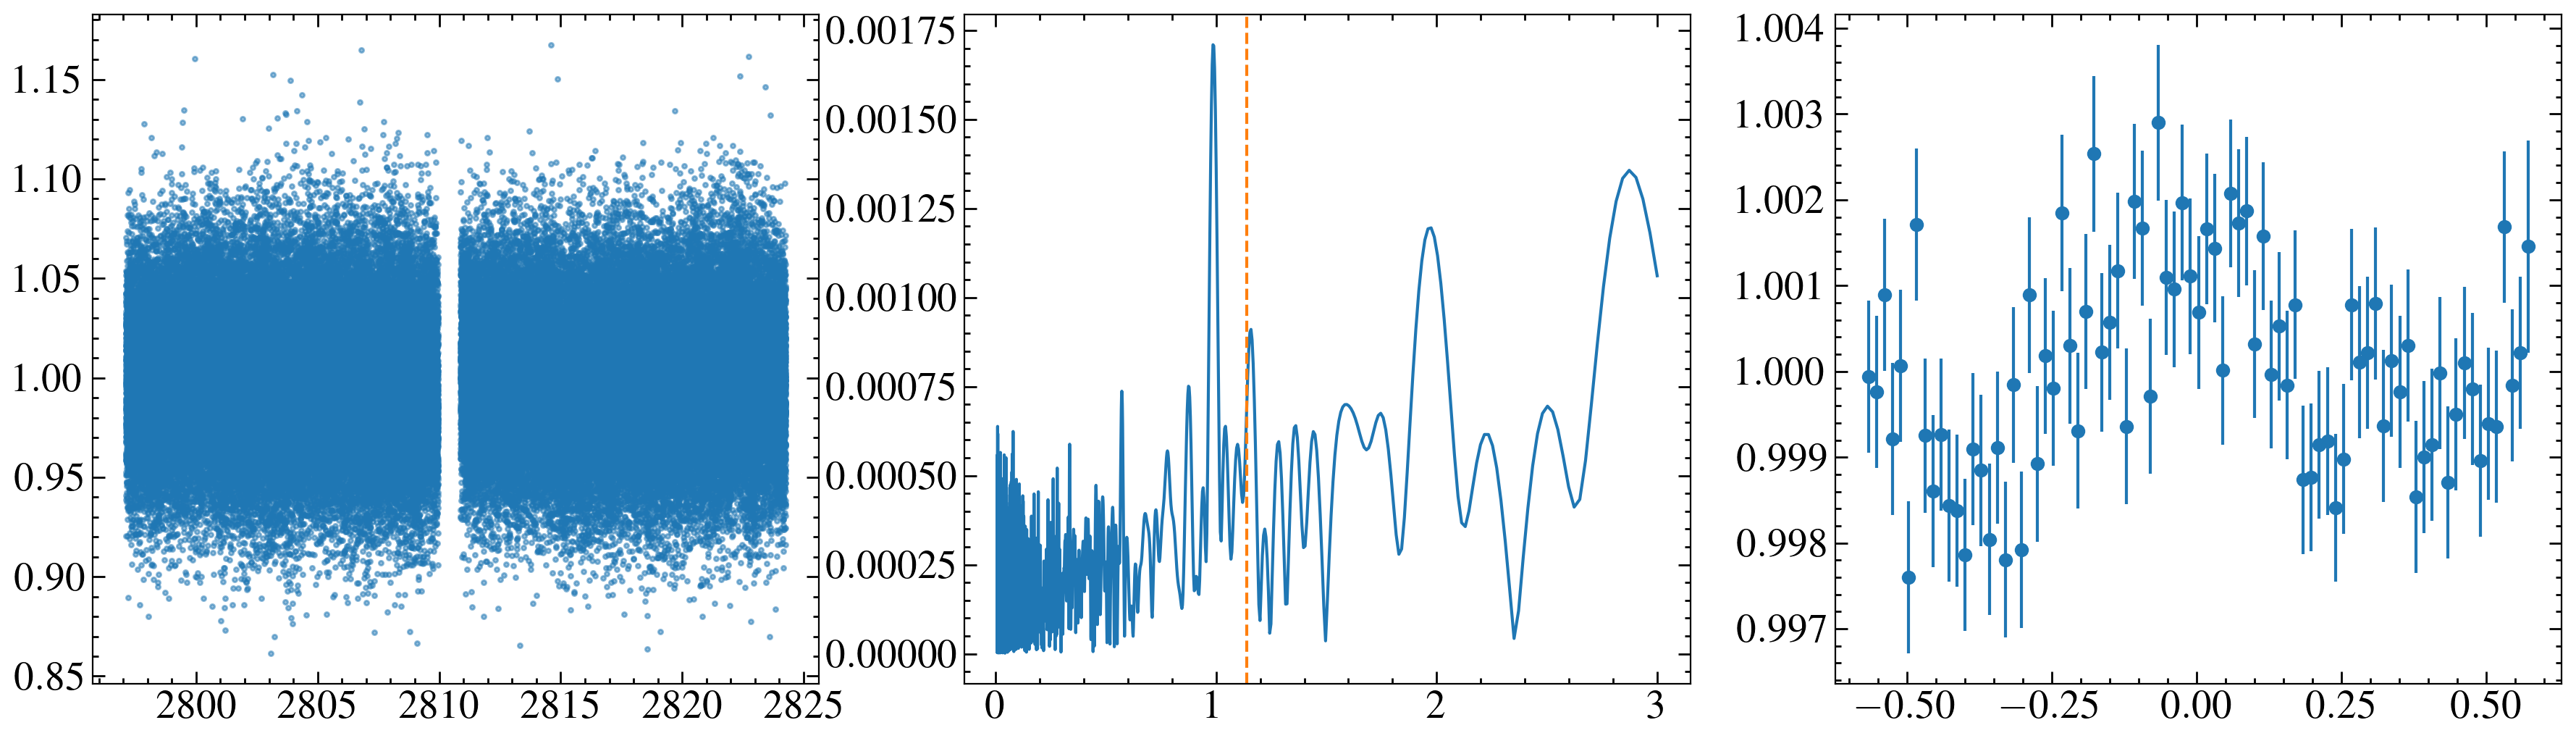

1.1429931980965744 d


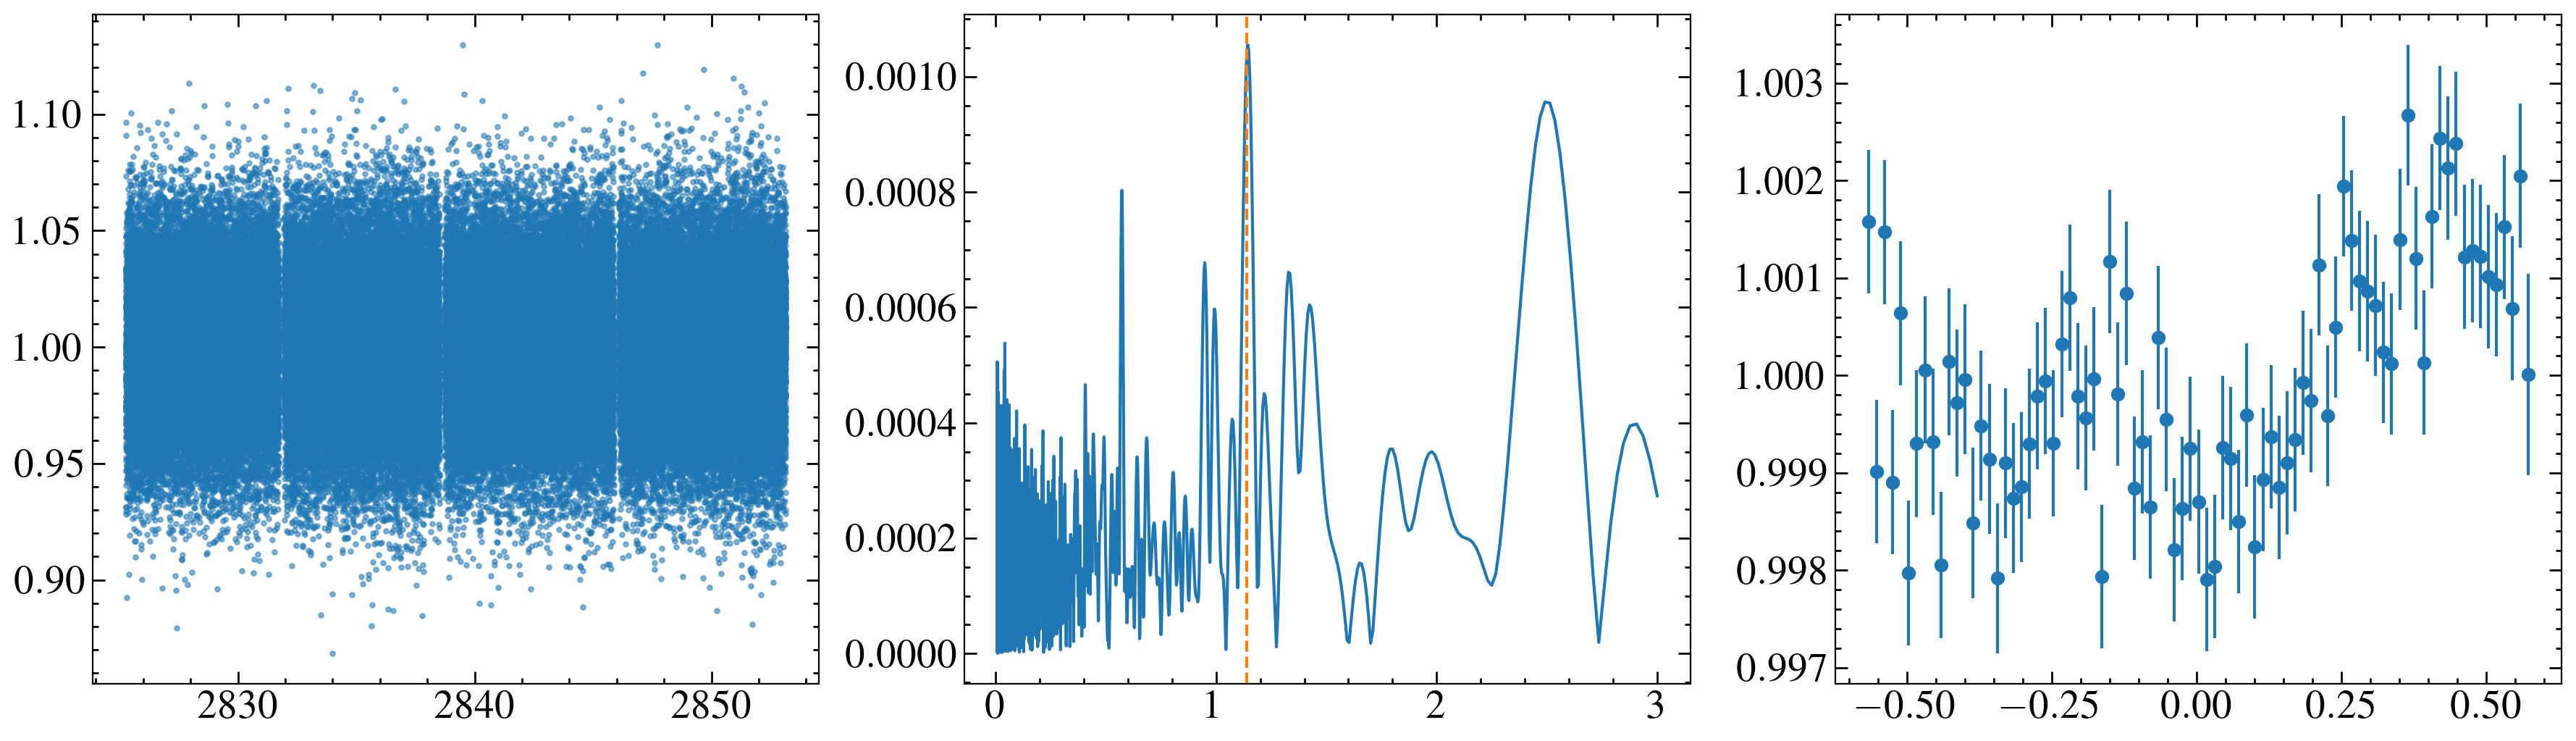

In [139]:
for i in [0, 6, 9, 11]:
    sr = search_result[i]
    # if sr.exptime[0].value == 120:
    lc = sr.download(download_dir='mastDownload/')
    plt.figure(figsize=(22, 6))
    lc = lc.remove_outliers()
    lcn=lc.normalize()
    # lcn.flux = lcn.flux.value -1
    # lcn.flux = lcn.flux*100
    # lcn.flux_err = lcn.flux_err.value*100

    plt.subplot(131)
    plt.scatter(lcn.time.value, lcn.flux, alpha=0.5,  s=5, rasterized = True)

    pg = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=10*u.min, maximum_period = 3*u.d)

    plt.subplot(132)
    plt.plot(pg.period, pg.power)
    period = pg.period_at_max_power
    print(period)

    plt.axvline(1.14, ls='--', c='C1')

    lcf = lcn.fold(1.146*u.d).bin(20*u.min)
    plt.subplot(133)
    # plt.scatter(lcf.time.value, lcf.flux)
    plt.errorbar(lcf.time.value, lcf.flux, lcf.flux_err, marker='o', ls='none')

        
        
    plt.show()
        # lc.plot()

1.1477672242011987 d


AttributeError: 'numpy.float64' object has no attribute 'value'

<Figure size 4400x1200 with 0 Axes>

<Figure size 4400x1200 with 0 Axes>

<Figure size 4400x1200 with 0 Axes>

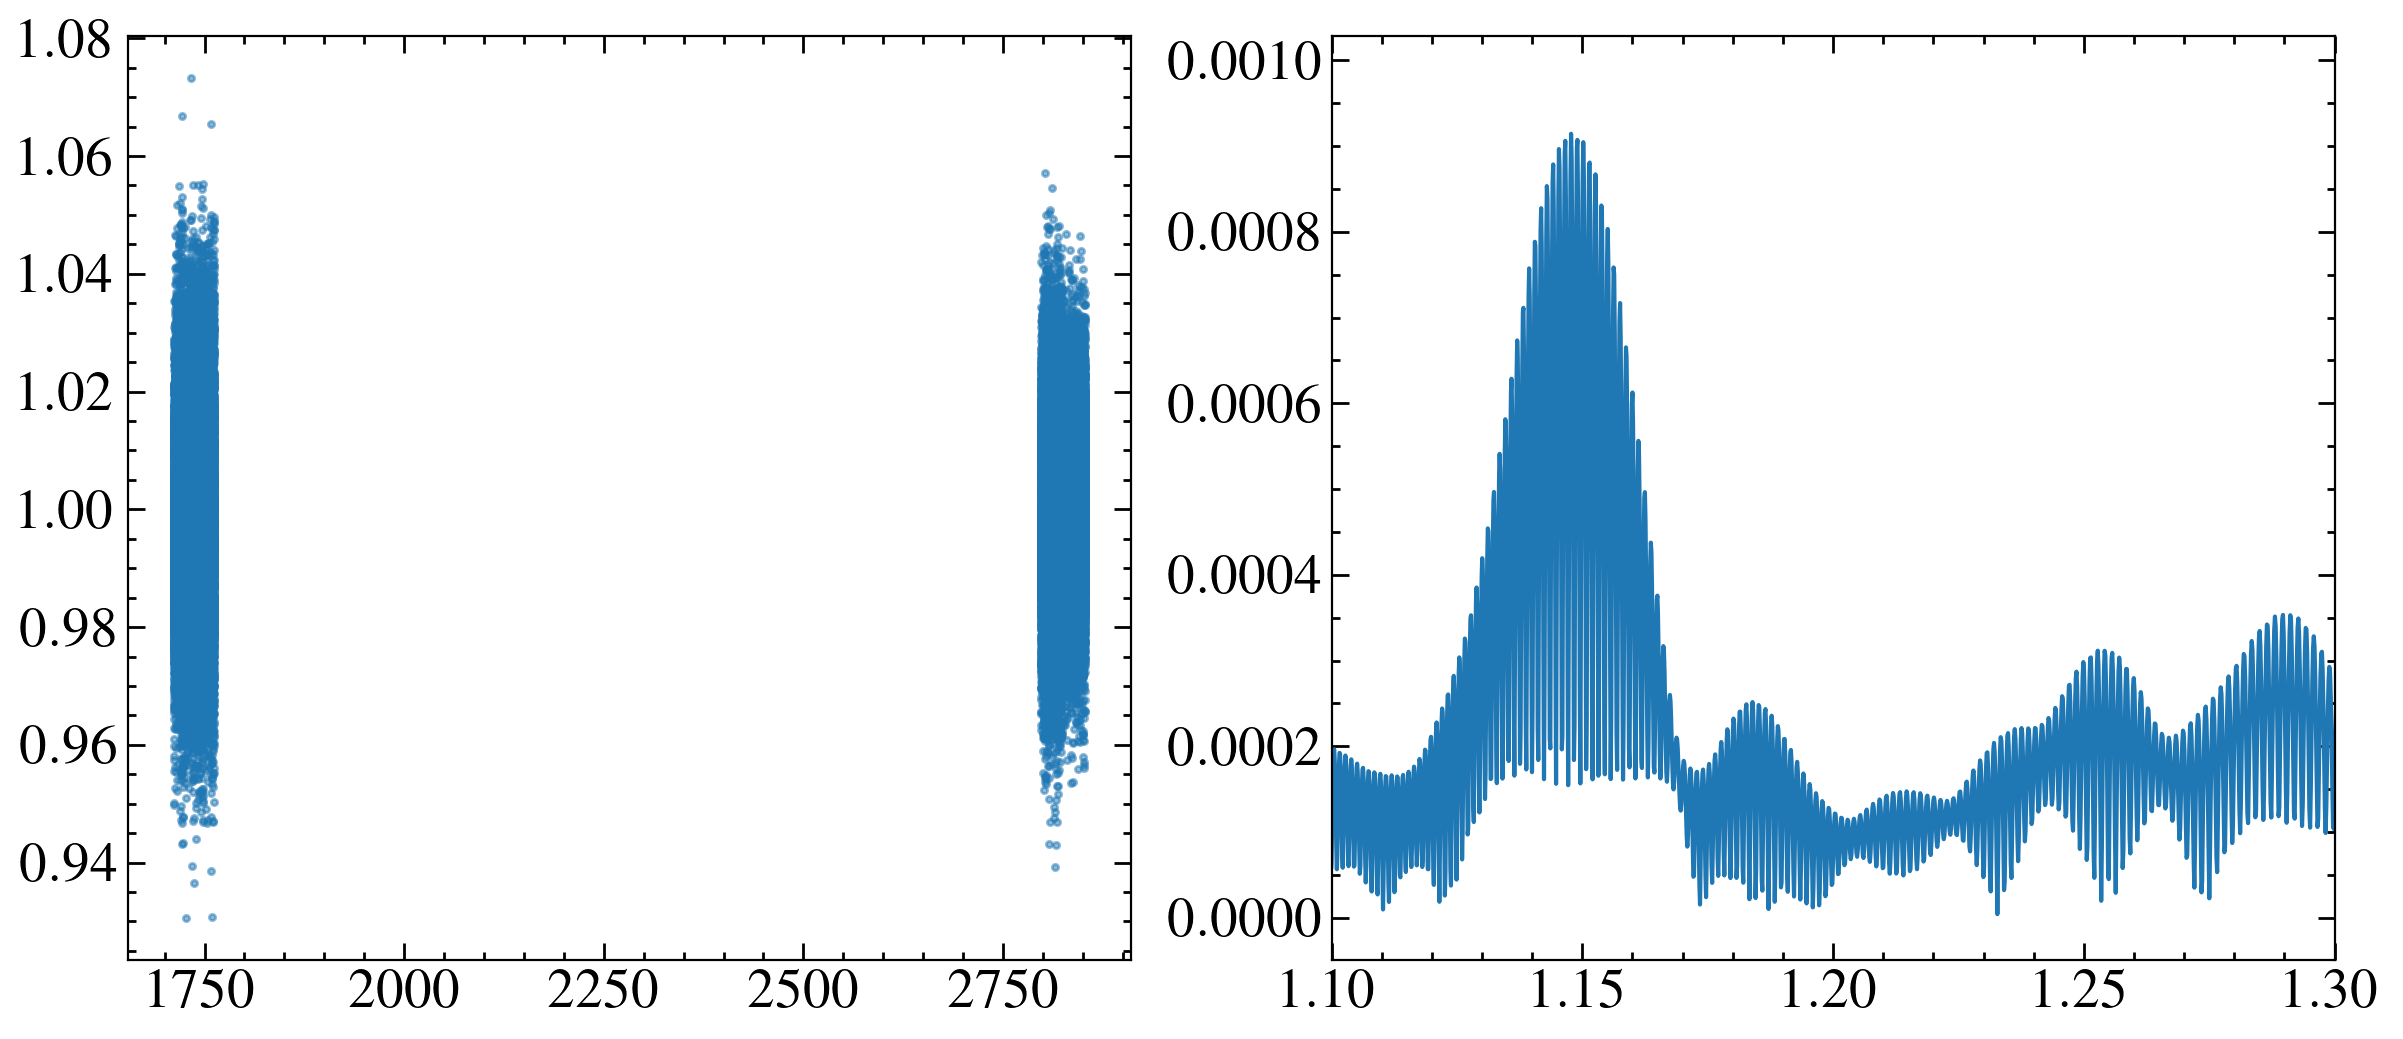

In [199]:
for i in [0, 6, 10, 12]:
    sr = search_result[i]
    # if sr.exptime[0].value == 120:
    lc = sr.download(download_dir='mastDownload/')

    plt.figure(figsize=(22, 6))
    lc = lc.remove_outliers()
    lcni=lc.normalize()
    # lcni.flux = lcni.flux.value -1
    # lcni.flux = lcni.flux*100
    # lcni.flux_err = lcni.flux_err.value*100
    
    if i == 0:
        lcn = lcni
    else:
        lcn = lcn.append(lcni)
    
    
plt.subplot(131)
plt.scatter(lcn.time.value, lcn.flux, alpha=0.5,  s=5, rasterized = True)

pg = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=10*u.min, maximum_period = 3*u.d)

plt.subplot(132)
plt.plot(pg.period, pg.power)
pg1 = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=1.1*u.day, maximum_period = 1.2*u.d)
pgperiod = pg1.period_at_max_power
plt.xlim(1.1, 1.3)
print(pgperiod)

plt.axvline(period.value, ls='--', c='C1')

lcf = lcn.fold(1.143*u.d).bin(20*u.min)
plt.subplot(133)
# plt.scatter(lcf.time.value, lcf.flux)
plt.errorbar(lcf.time.value, lcf.flux, lcf.flux_err, marker='o', ls='none')

nearmod = models.Sine1D(amplitude=0.1, frequency = 1/period.value, phase=0.3)
# print(nearmod)
time = lcf.time.value
# print(time)
modf = lcf.flux-nearmod(time)

# plt.errorbar(lcf.time.value, modf, lcf.flux_err, marker='o', ls='none')


plt.show()

Still there! Has the period changed?

1.148326751646135 d


<Figure size 4400x1200 with 0 Axes>

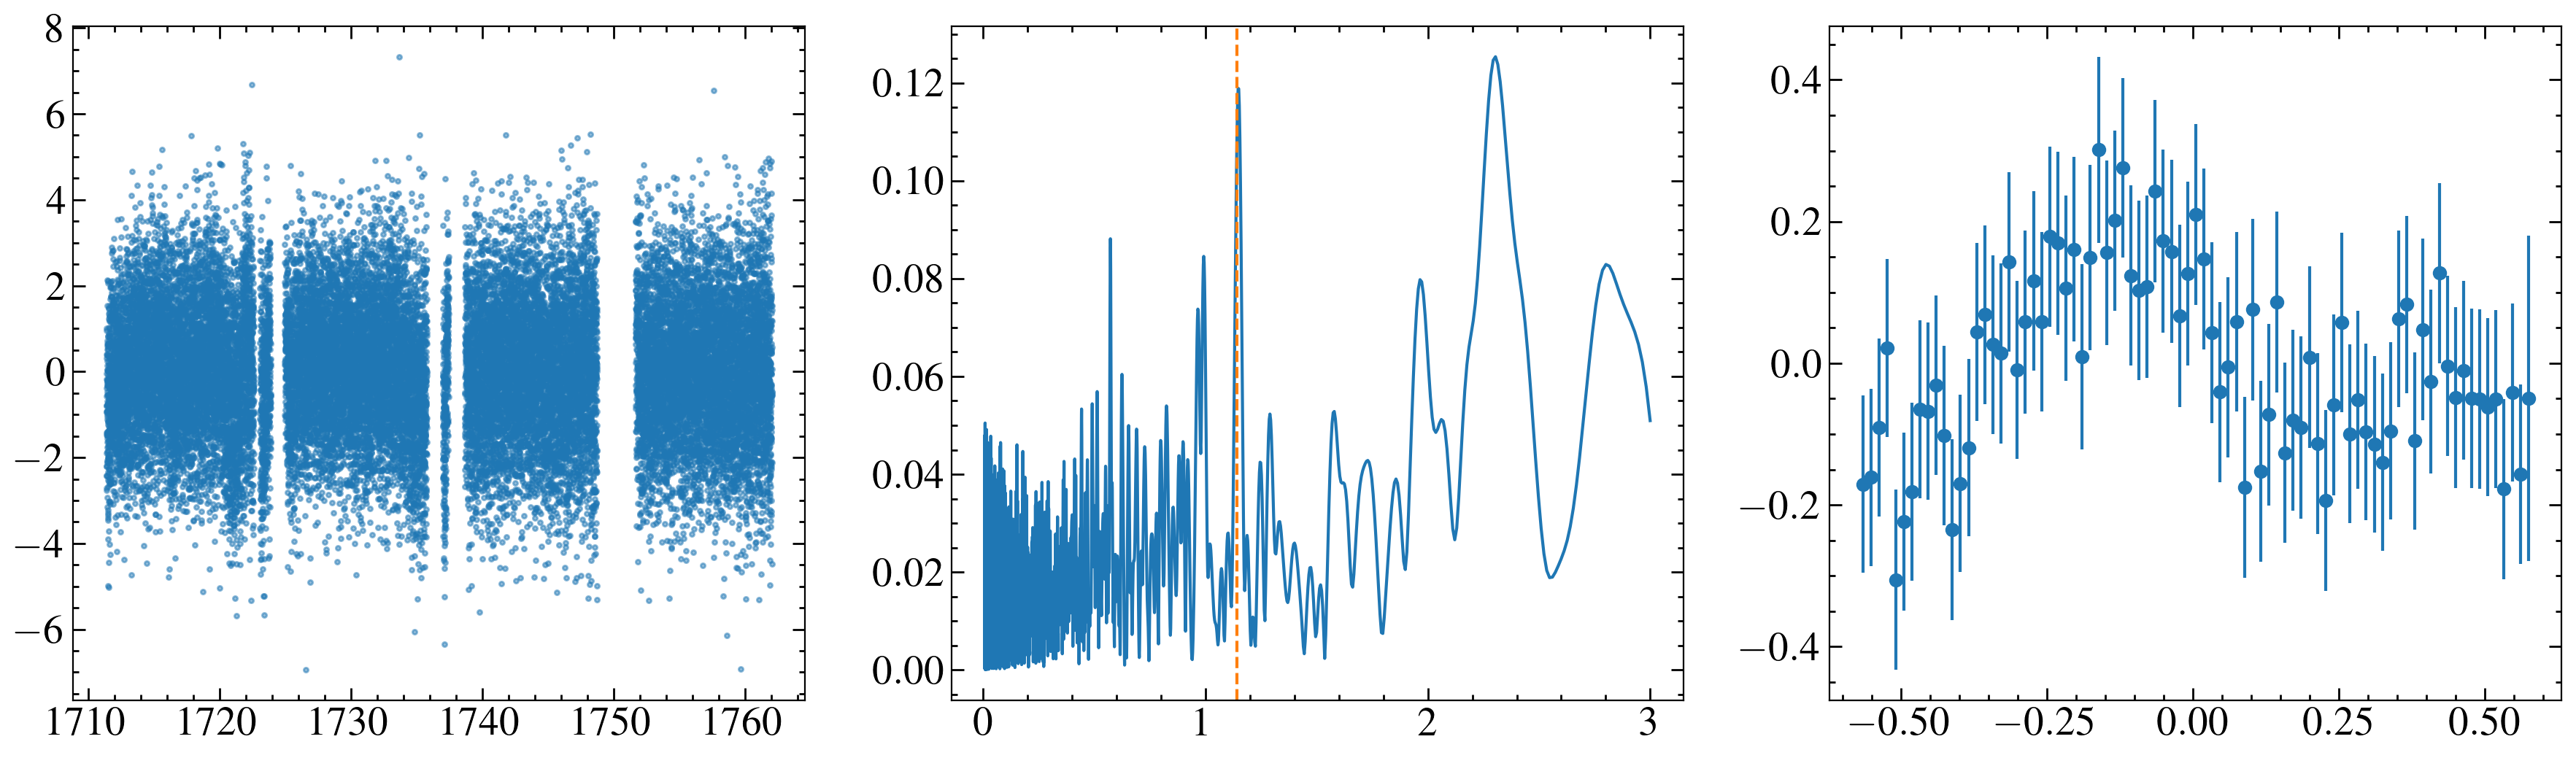

1.1460120192082754 d


<Figure size 4400x1200 with 0 Axes>

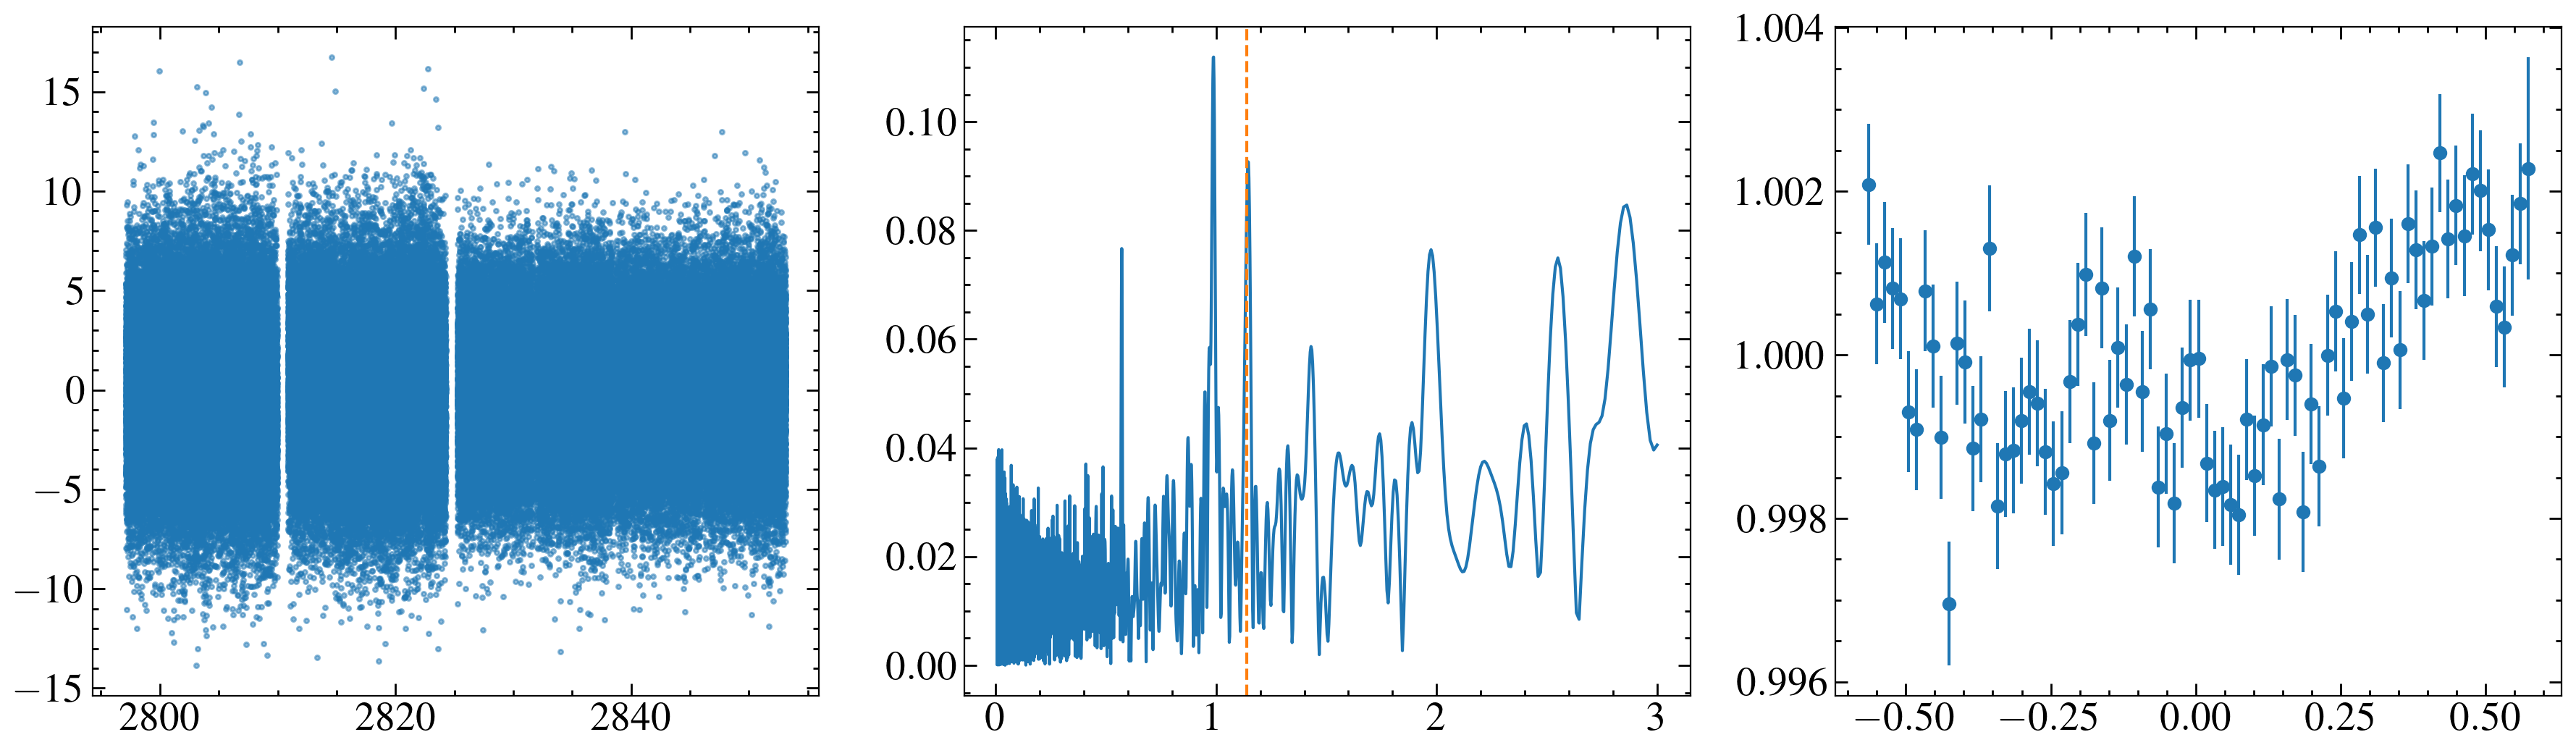

In [149]:
for i in [0, 6]:
    sr = search_result[i]
    # if sr.exptime[0].value == 120:
    lc = sr.download(download_dir='mastDownload/')

    plt.figure(figsize=(22, 6))
    lc = lc.remove_outliers()
    lcni=lc.normalize()
    lcni.flux = lcni.flux.value -1
    lcni.flux = lcni.flux*100
    lcni.flux_err = lcni.flux_err.value*100
    
    if i == 0:
        lcn1 = lcni
    else:
        lcn1 = lcn1.append(lcni)
    
    
plt.subplot(131)
plt.scatter(lcn1.time.value, lcn1.flux, alpha=0.5,  s=5, rasterized = True)

pg = lcn1.to_periodogram(method='ls',oversample_factor=10, minimum_period=10*u.min, maximum_period = 3*u.d)

plt.subplot(132)
plt.plot(pg.period, pg.power)
pg1 = lcn1.to_periodogram(method='ls',oversample_factor=10, minimum_period=1.1*u.day, maximum_period = 1.2*u.d)
period1 = pg1.period_at_max_power
# plt.xlim(1.1, 1.3)
print(period1)

plt.axvline(1.14, ls='--', c='C1')

lcf = lcn1.fold(1.143*u.d).bin(20*u.min)
plt.subplot(133)
# plt.scatter(lcf.time.value, lcf.flux)
plt.errorbar(lcf.time.value, lcf.flux, lcf.flux_err, marker='o', ls='none')

nearmod = models.Sine1D(amplitude=0.1, frequency = 1/period.value, phase=0.3)
# print(nearmod)
time = lcf.time.value
# print(time)
modf = lcf.flux-nearmod(time)

# plt.errorbar(lcf.time.value, modf, lcf.flux_err, marker='o', ls='none')


plt.show()

for i in [9, 11]:
    sr = search_result[i]
    # if sr.exptime[0].value == 120:
    lc = sr.download(download_dir='mastDownload/')

    plt.figure(figsize=(22, 6))
    lc = lc.remove_outliers()
    lcni=lc.normalize()
    lcni.flux = lcni.flux.value -1
    lcni.flux = lcni.flux*100
    lcni.flux_err = lcni.flux_err.value*100
    
    if i == 9:
        lcn2 = lcni
    else:
        lcn2 = lcn2.append(lcni)
    
    
plt.subplot(131)
plt.scatter(lcn2.time.value, lcn2.flux, alpha=0.5,  s=5, rasterized = True)

pg = lcn2.to_periodogram(method='ls',oversample_factor=10, minimum_period=10*u.min, maximum_period = 3*u.d)

plt.subplot(132)
plt.plot(pg.period, pg.power)
pg1 = lcn2.to_periodogram(method='ls',oversample_factor=10, minimum_period=1.1*u.day, maximum_period = 1.2*u.d)
period1 = pg1.period_at_max_power
# plt.xlim(1.1, 1.3)
print(period1)

plt.axvline(1.14, ls='--', c='C1')

lcf = lcn.fold(1.143*u.d).bin(20*u.min)
plt.subplot(133)
# plt.scatter(lcf.time.value, lcf.flux)
plt.errorbar(lcf.time.value, lcf.flux, lcf.flux_err, marker='o', ls='none')

nearmod = models.Sine1D(amplitude=0.1, frequency = 1/period.value, phase=0.3)
# print(nearmod)
time = lcf.time.value
# print(time)
modf = lcf.flux-nearmod(time)

# plt.errorbar(lcf.time.value, modf, lcf.flux_err, marker='o', ls='none')


plt.show()

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Sine1D(amplitude=-0.00079012, frequency=0.87132093, phase=-0.26171823)>

    [1]: <Const1D(amplitude=1.)>
Parameters:
         amplitude_0          frequency_0           phase_0       amplitude_1
    ---------------------- ------------------ ------------------- -----------
    -0.0007901156341845186 0.8713209343452902 -0.2617182263433127         1.0
[3.01099838e-04 3.37042874e-05 4.97114093e-02]
1.1476827430427792 4.439446764658889e-05


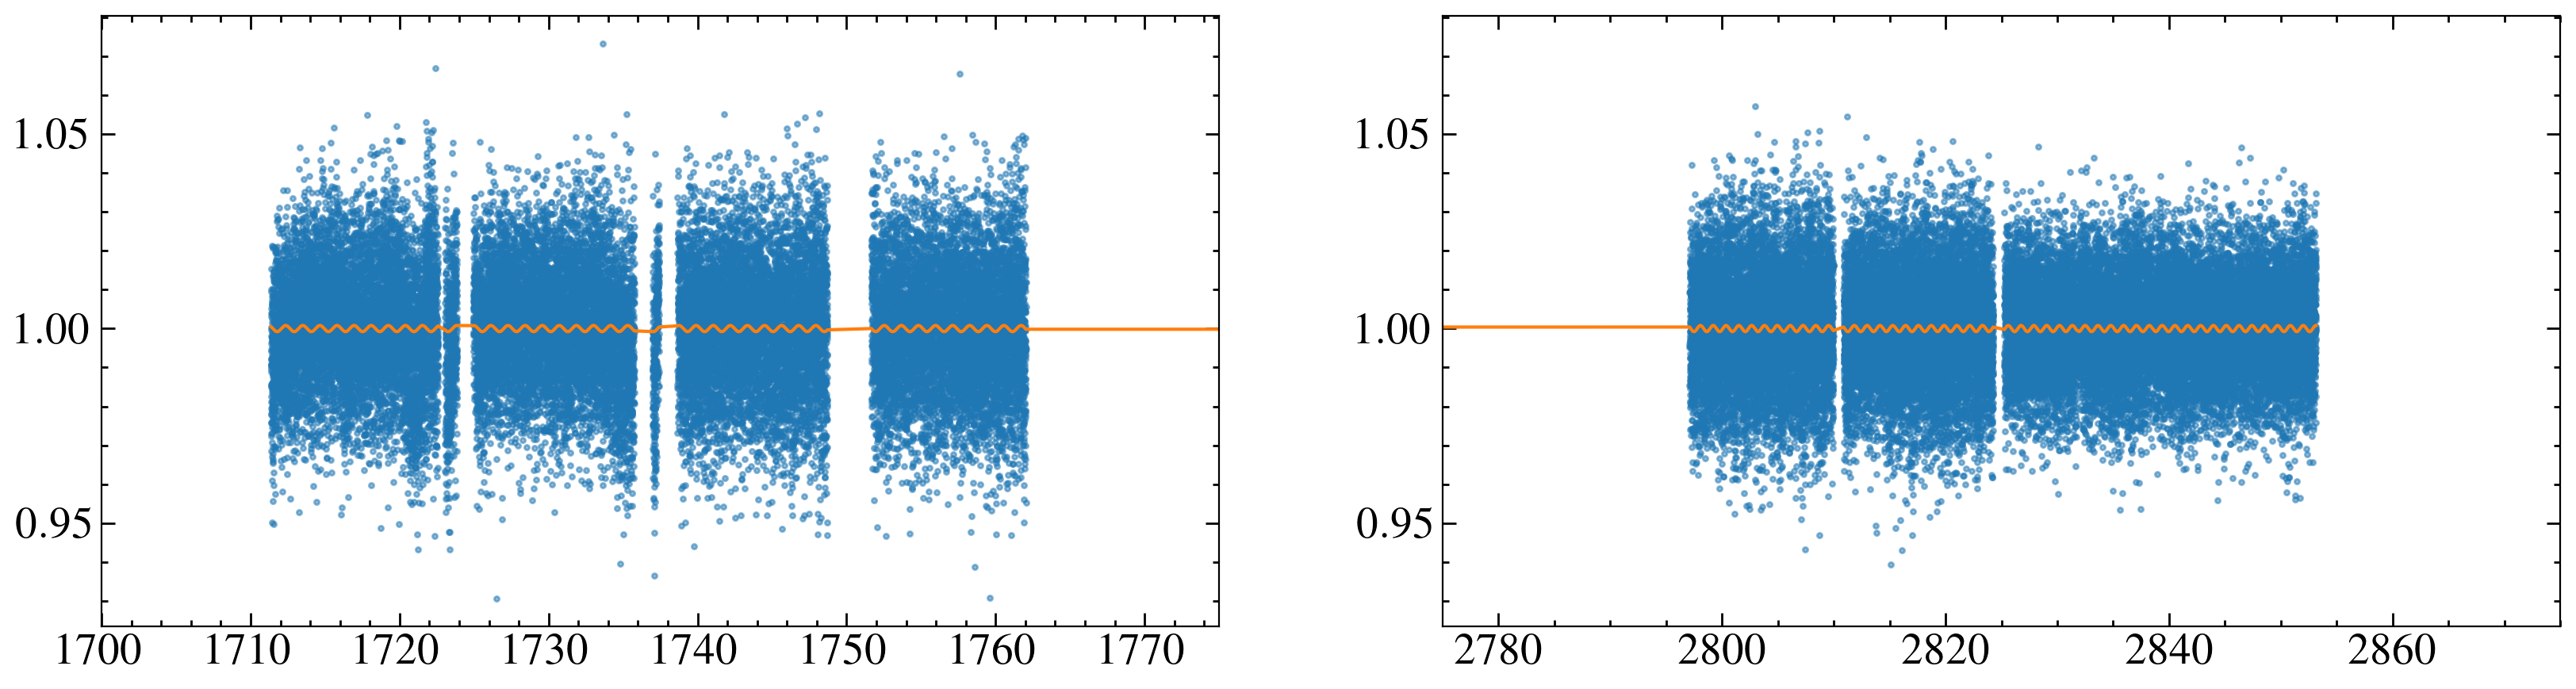

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Sine1D(amplitude=0.00089581, frequency=0.87132093, phase=0.397104)>

    [1]: <Const1D(amplitude=1.)>
Parameters:
         amplitude_0         frequency_0          phase_0       amplitude_1
    --------------------- ------------------ ------------------ -----------
    0.0008958098867527853 0.8713209343452902 0.3971039978206367         1.0
[8.35607051e-05 1.47616563e-02]


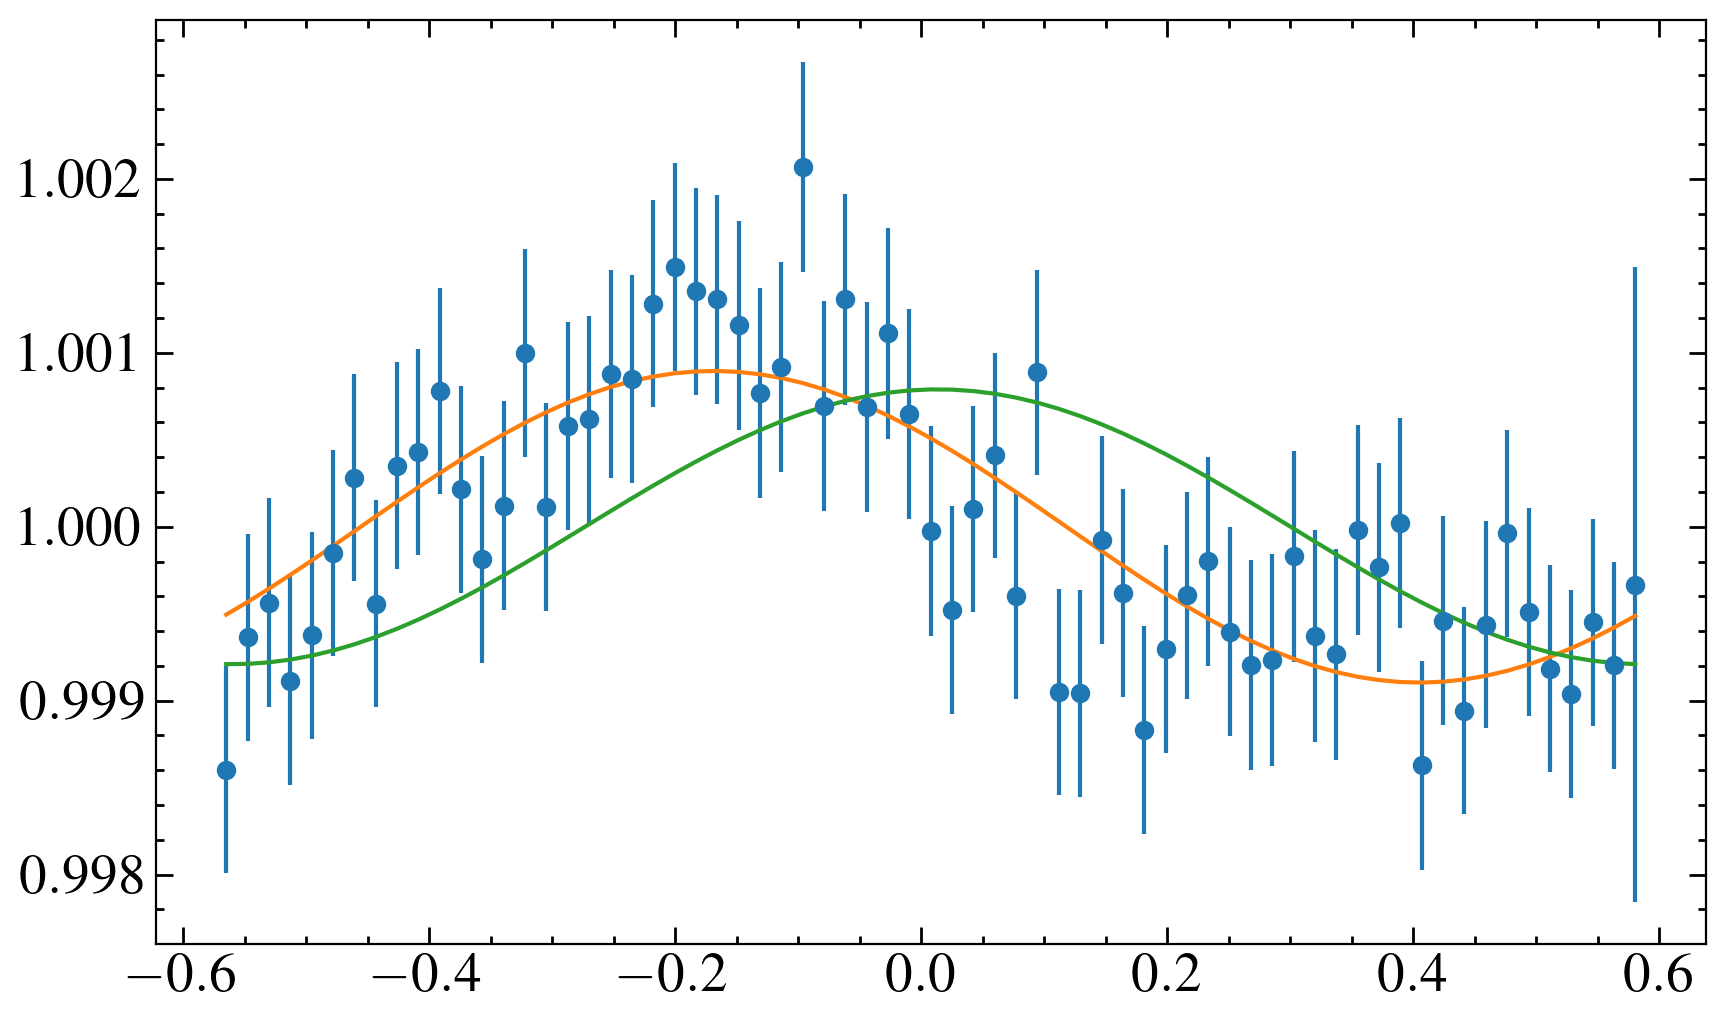

In [231]:
fitter = fitting.LevMarLSQFitter()


fig, ax = plt.subplots(figsize=(20,5), ncols=2)


sinemod = models.Sine1D(amplitude=0.1, frequency = 1/pgperiod.value, phase=0)+models.Const1D(1, fixed=dict(amplitude=True))
fitmod = fitter(sinemod, lcn.time.value,lcn.flux.value, weights=1/lcn.flux_err.value, maxiter=100000)
fitmod_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))

ax[0].scatter(lcn.time.value, lcn.flux, alpha=0.5,  s=5, rasterized = True)
ax[0].plot(lcn.time.value, fitmod(lcn.time.value), c='C1')
ax[0].set_xlim(1700, 1775)  


ax[1].scatter(lcn.time.value, lcn.flux, alpha=0.5,  s=5, rasterized = True)
ax[1].plot(lcn.time.value, fitmod(lcn.time.value), c='C1')
ax[1].set_xlim(2775, 2875)

print(fitmod)
print(fitmod_e)

# print(1/fitmod[0].frequency)

period = 1/fitmod[0].frequency
period_e = fitmod_e[1]/(fitmod[0].frequency**2)
print(period, period_e)

plt.show()

lcf = lcn.fold(period).bin(25*u.min)
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(lcf.time.value, lcf.flux, lcf.flux_err, marker='o', ls='none')
sinefold = models.Sine1D(amplitude=fitmod[0].amplitude, frequency = fitmod[0].frequency,phase =0.5, fixed = dict(frequency=True))+models.Const1D(1, fixed=dict(amplitude=True))
foldfit = fitter(sinefold, lcf.time.value,lcf.flux.value, weights=1/lcf.flux_err.value, maxiter=100000)
foldfit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
ax.plot(lcf.time.value, foldfit(lcf.time.value), c='C1')
ax.plot(lcf.time.value, fitmod(lcf.time.value), c='C2')
print(foldfit)
print(foldfit_e)


0.016941698241909494
2282.254152795827
2282.572140975709
2459282.572140976
545.0121409757994
474.8804879045606


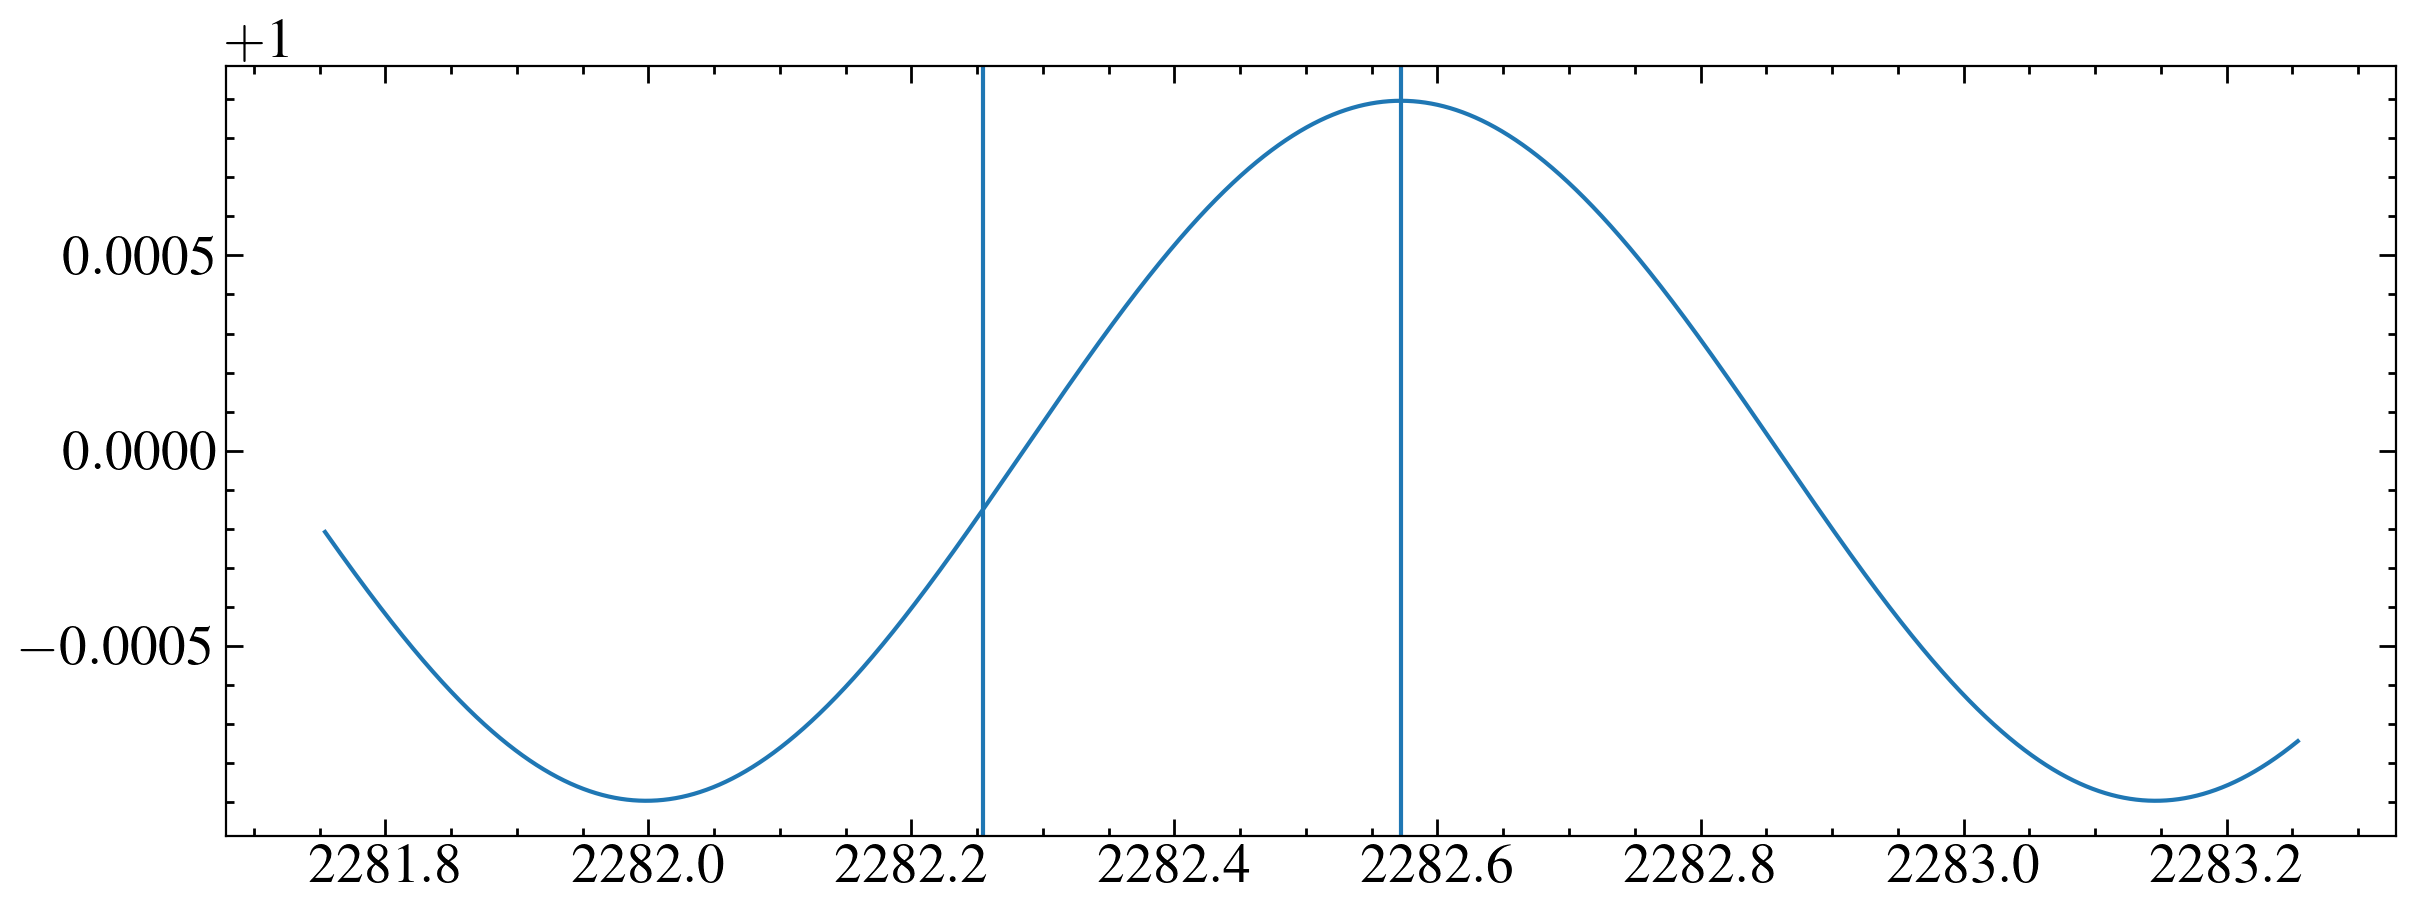

In [226]:
#ephermeris
eph_e = period * foldfit_e[1]
print(eph_e)

mid_t = (lcn.time.value[0])+(lcn.time.value[-1] - lcn.time.value[0]) /2
# mid_t = (min(lcn.time.value))+(max(lcn.time.value) /2)
print(mid_t)
midrange = np.linspace(mid_t-0.5, mid_t+1, 100000)
# midmod = fitmod(midrange)
midmod = models.Sine1D(amplitude=foldfit[0].amplitude, frequency = 1/period, phase=foldfit[0].phase)+models.Const1D(1)
midmod = midmod(midrange)
plt.plot(midrange, midmod)
plt.axvline(mid_t)
high = midrange[np.argmax(midmod)]
plt.axvline(high)
print(high)
eph = high +2457000
print(eph)
oldeph = 2458737.560
print(eph-oldeph)
print((eph-oldeph)/period)

In [48]:
from astropy.modeling.models import custom_model


@custom_model
def spot_model(x, gamma=1, U=1, kw=0., beta=0, i = np.pi/2, lam=np.pi):
    #phi = np.linspace(0, 360, 100)
    y = np.array([counts_at_phi(p*2*np.pi, gamma, U, kw, beta, i, lam) for p in x+0.5])
    return y
    

def counts_at_phi(phi, gamma, U, kw, beta, i, lam):
    z0 = get_z0(phi, beta, i, lam)
    eps0, reg, d = coverage(phi, gamma, z0) 
    c = U*(1-(1-kw)*eps0)
    return c

def coverage(phi, gamma, z0):
    k = np.sin(gamma)
    d = ((1-k**2)*(1-z0**2))**0.5 
    if  d <= (1 - k**2) and gamma >=np.pi/2:
        eps = 1.0
        reg= 1
    elif  d <= (1 - k**2):
        reg= 2
        eps = (k**2)*z0
    elif  d > (1 - k**2):
        reg= 3
        s = (1 - k**2)/d 
        v = (d - s) / (k*z0)
        eps = (1/np.pi) *( np.arccos(s) - (s*(1-s**2)**0.5) + ( (k**2) * z0*(np.arccos(v) - (v*(1-v**2)**0.5))))
        
    if eps < 0:
        eps = 0 #hack? I guess? It fixes it?
        
    return eps, reg, d

def get_z0(phi, beta, i, lam):
    z0 = np.cos(lam - phi) * np.cos(beta) * np.sin(i) + np.sin(beta) * np.cos(i)
    return z0

Model: spot_model
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          gamma                U          ...         i                 lam       
    ------------------ ------------------ ... ------------------ -----------------
    0.6204645490839841 0.9994823214682667 ... 1.5707963267948966 3.141592653589793
1.0072463599646744
[0.00043048]


Text(0, 0.5, 'Relative Flux')

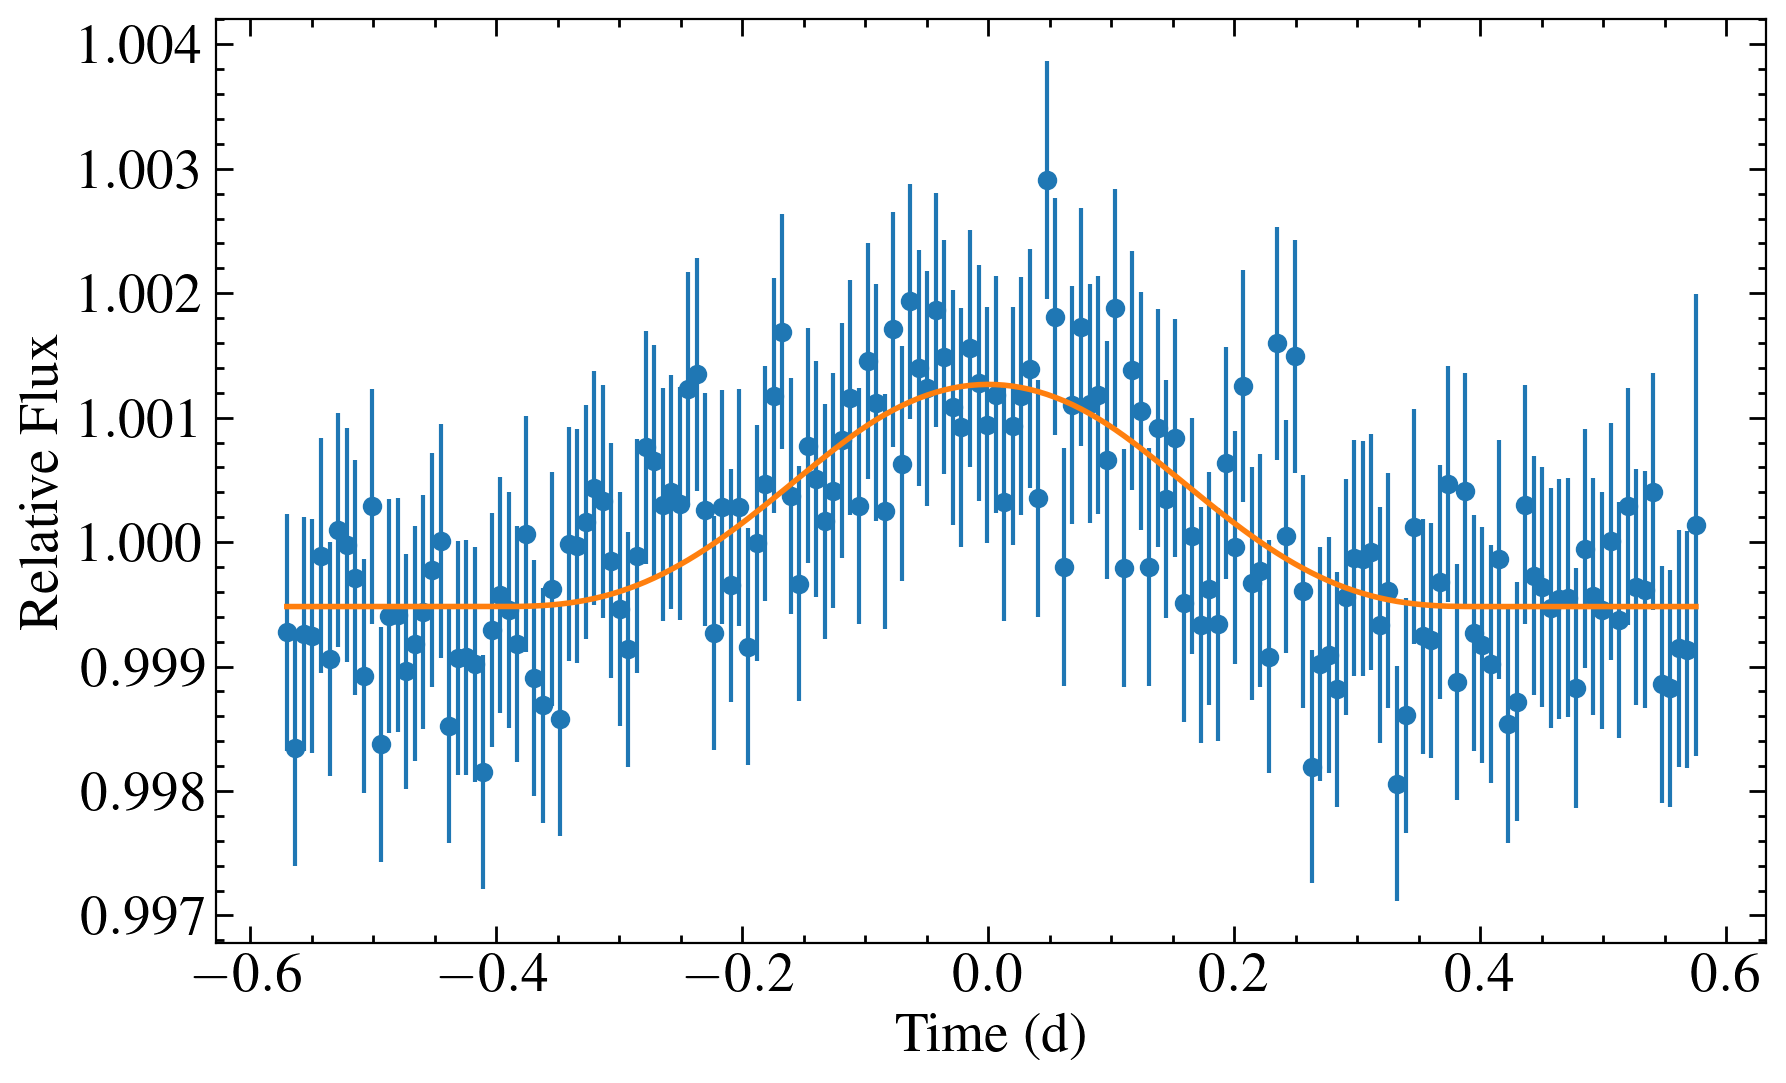

In [237]:
lcf = lcn.fold(period, epoch_phase=foldfit[0].phase-0.25).bin(10*u.min)
# lcf = lcn.fold(period, epoch_time=eph).bin(25*u.min)


utess = abs(np.mean([np.mean(lcf.flux[:10]), np.mean(lcf.flux[-11:])]))
dgamma = 35.55*np.pi/180
dbeta = 43.193*np.pi/180 
m_init = spot_model(gamma=dgamma, U=utess, kw = 0.9, beta=dbeta, fixed=dict(gamma=True, U=True, beta=True, i=True, lam=True))
spotfit = fitter(m_init, lcf.time.value,lcf.flux.value, weights=1/lcf.flux_err.value, maxiter=100000)
spotfit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))

print(spotfit)
print(spotfit.kw.value)
print(spotfit_e)


fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(lcf.time.value, lcf.flux, lcf.flux_err, marker='o', ls='none')
ax.plot(lcf.time.value, spotfit(lcf.time.value), zorder=+10, lw=2)
ax.set_xlabel('Time (d)')
ax.set_ylabel('Relative Flux')

In [110]:
#chandra
path = '/media/david/2tb_ext_hd/hddata/gd394/chandra/tgcat/'
obs = glob.glob('{}obs*'.format(path))
obs

['/media/david/2tb_ext_hd/hddata/gd394/chandra/tgcat/obs_21181_tgid_6072',
 '/media/david/2tb_ext_hd/hddata/gd394/chandra/tgcat/obs_22956_tgid_6070']

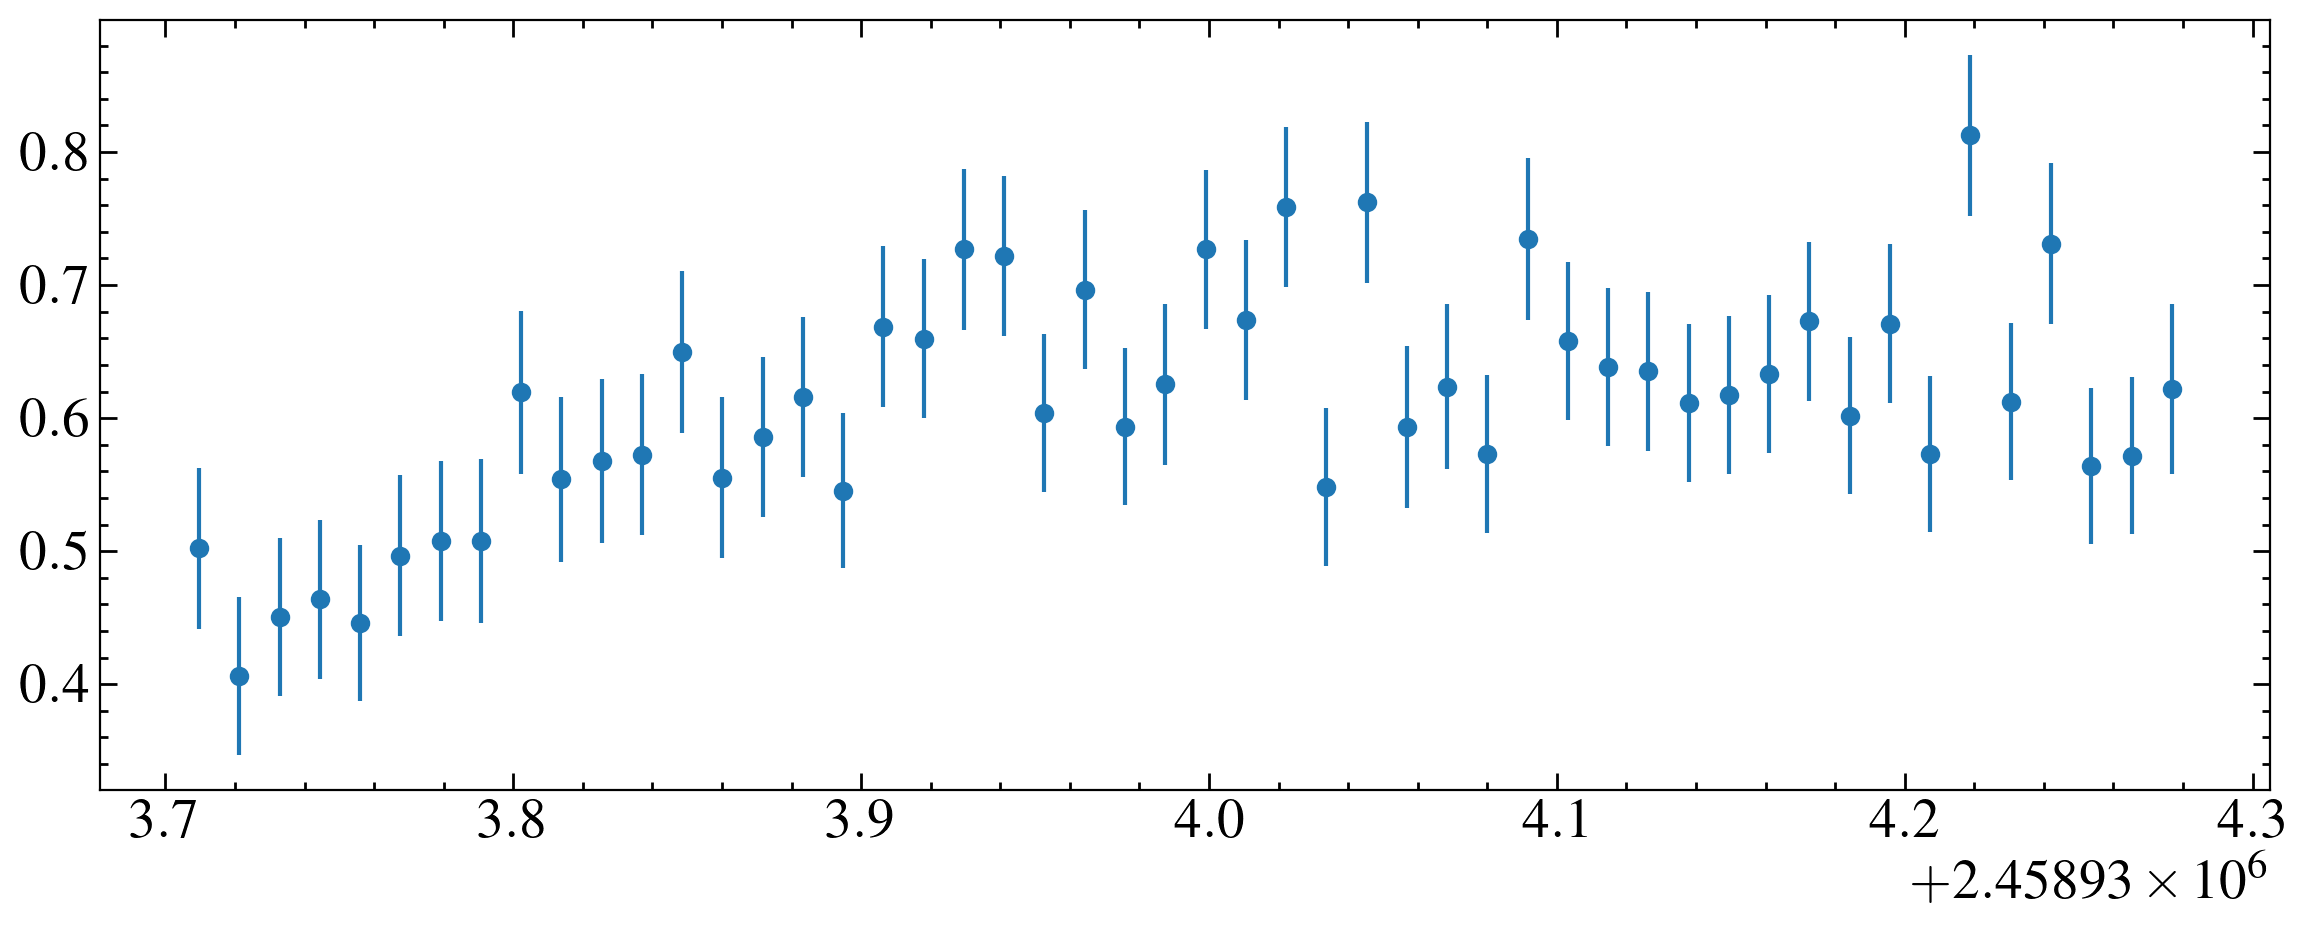

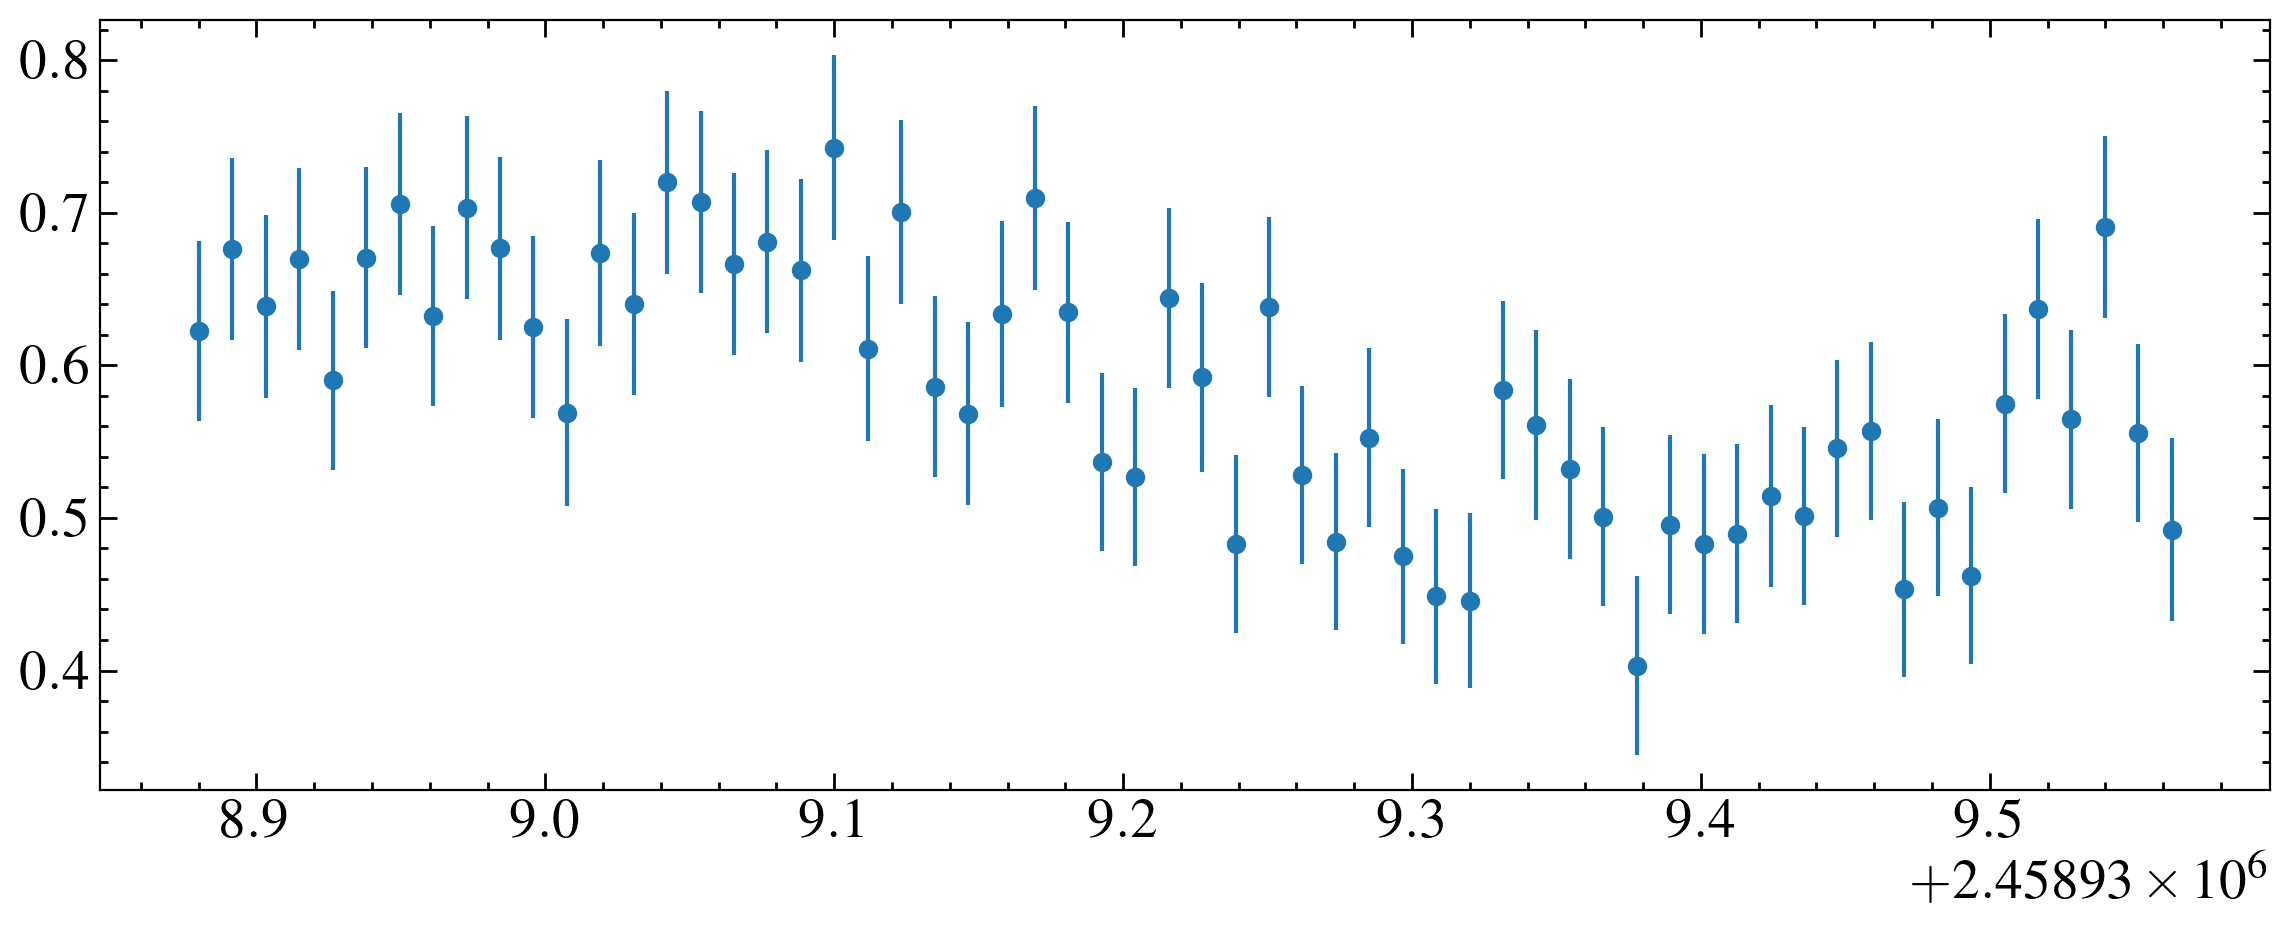

In [111]:
times = np.array([], dtype=float)
counts = np.array([], dtype=float)
error = np.array([], dtype=float)
for ob in obs:
    lc = fits.getdata('{}/lc'.format(ob), 1)   
    bg = fits.getdata('{}/lc_bg'.format(ob), 1)
    bgscale = fits.getheader('{}/lc_bg'.format(ob), 1)['BACKSCAL']
    mjdref = fits.getheader('{}/lc'.format(ob), 1)['MJDREF']
#     print(lc['AREA'])
#     print(bg['AREA'])
    t, c, ce, bgc, bgce = lc['TIME']*u.s, lc['COUNT_RATE'], lc['COUNT_RATE_ERR'], bg['COUNT_RATE']/bgscale, bg['COUNT_RATE_ERR']//bgscale
    t = (t.to(u.d).value + mjdref+ 2400000.5)*u.d
    nc = c-bgc
    ne = (ce**2+bgce**2)**0.5
    plt.errorbar(t[1:-1].value, nc[1:-1], yerr=ne[1:-1], marker='o', ls='none')
    times = np.concatenate((times, t[1:-1]))
    counts = np.concatenate((counts, nc[1:-1]))
    error = np.concatenate((error, ne[1:-1]))
    plt.show()

<ErrorbarContainer object of 3 artists>

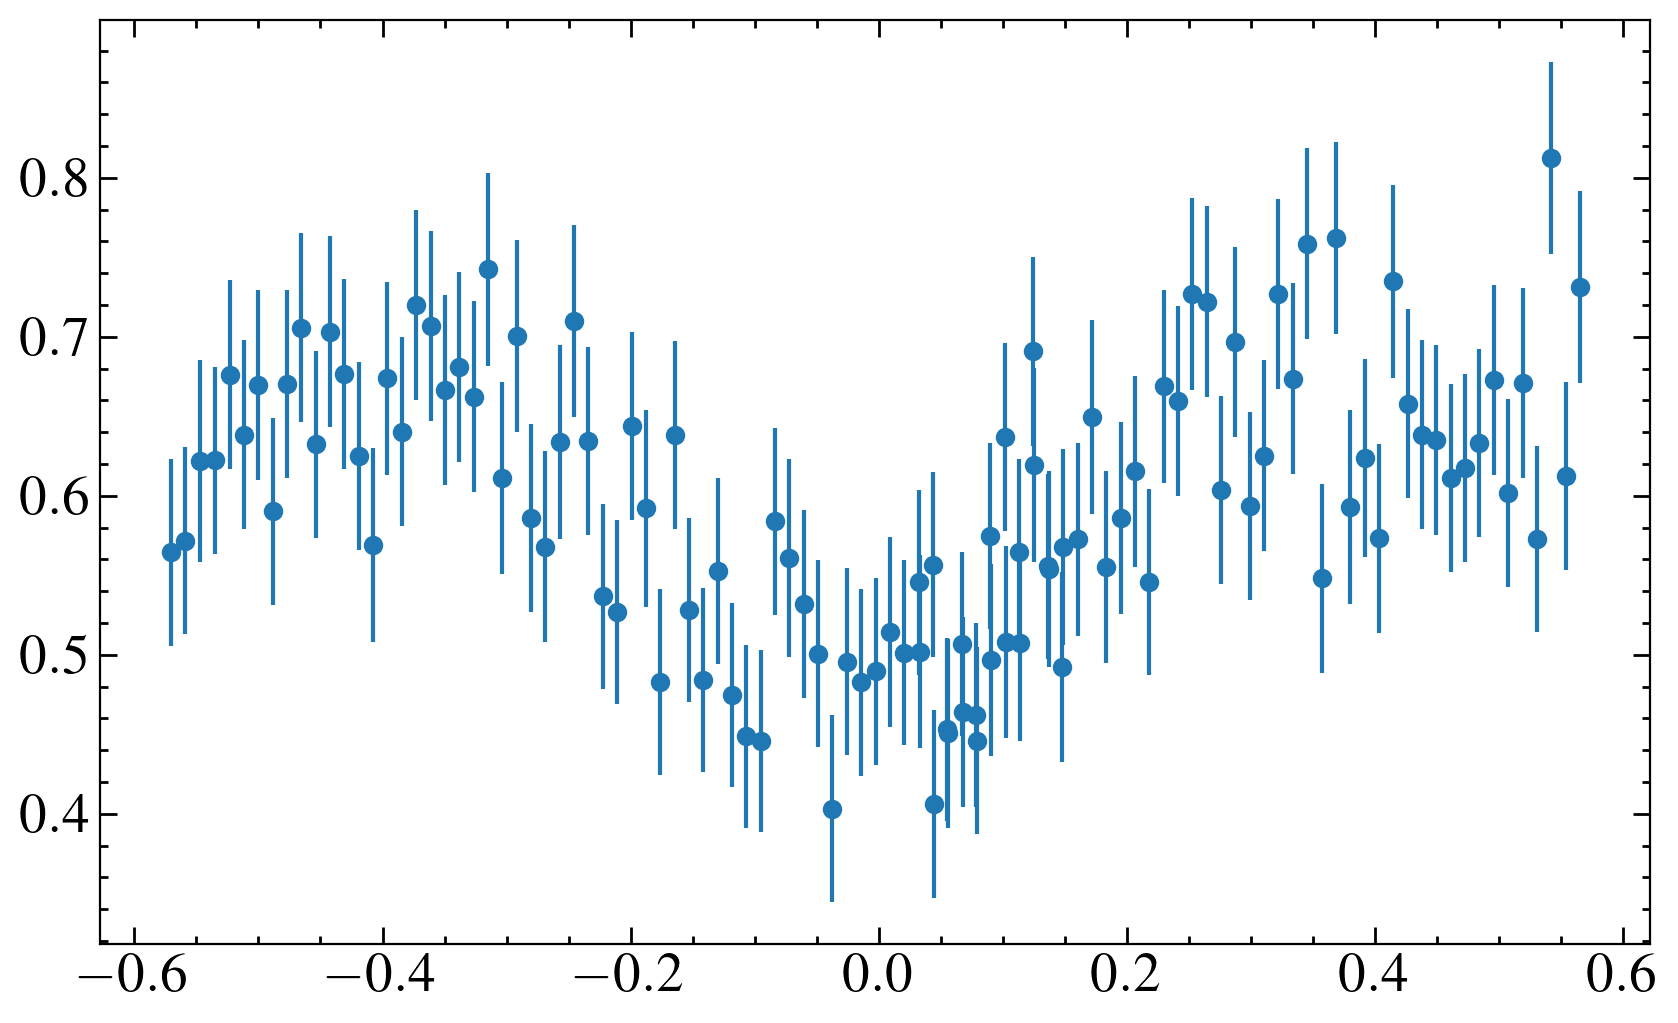

In [205]:
lc = lk.LightCurve(time = times, flux=counts, flux_err=error)
# print(1/fitmod[0].frequency)
oldperiod = 1.1468*u.d
clcf = lc.fold(period, epoch_time=eph)
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(clcf.time.value, clcf.flux, clcf.flux_err, marker='o', ls='none')